In [1]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [16, 5]
# plt.rcParams['figure.dpi'] = 140
plt.style.use('seaborn')

file = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/03.%20Statistika%20Terapan/Data%20Stater.csv'

In [2]:
raw_df = pd.read_csv(file)
raw_df

,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman
0,ORD-BS-00140940342-1,1/2/2020,1,Pittsburgh Mountain Machines,BM-CC-057,1,"7,460",-,"7,460",1,50,"7,510",669618
1,ORD-BS-00140940342-1,1/2/2020,2,Pittsburgh Mountain Machines,BR-EC-009,1,"2,240",-,"2,240",1,50,"2,290",669618
2,ORD-BS-00140940342-1,1/2/2020,3,Pittsburgh Mountain Machines,BM-OC-049,2,"7,680",-,"15,360",1,50,"15,410",669618
3,ORD-BS-00141011421-2,1/4/2020,1,Pittsburgh Mountain Machines,BR-TC-040,1,"3,200",-,"3,200",2,30,"3,260",848311
4,ORD-BS-00141011421-2,1/4/2020,2,Pittsburgh Mountain Machines,BM-CC-059,1,"5,330",-,"5,330",1,50,"5,380",848311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,12/26/2020,3,Tampa 29ers,BR-EC-024,1,"5,860",-,"5,860",1,60,"5,920",185077
2659,ORD-BS-03041079496-2,12/26/2020,4,Tampa 29ers,BR-TC-038,1,"7,000",-,"7,000",1,60,"7,060",185077
2660,ORD-BS-03041079496-2,12/26/2020,5,Tampa 29ers,BM-CC-055,1,"12,790",-,"12,790",2,30,"12,850",185077
2661,ORD-BS-03041079496-2,12/26/2020,6,Tampa 29ers,BM-CC-057,3,"22,380",-,"67,140",1,60,"67,200",185077


## Tipe Data

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No.Invoice       2663 non-null   object
 1   Tanggal Invoice  2663 non-null   object
 2   No.Urut          2663 non-null   int64 
 3   Nama Pelanggan   2663 non-null   object
 4   Kode Produk      2663 non-null   object
 5   Quantity         2663 non-null   int64 
 6    Gross sales     2663 non-null   object
 7    Discount        2663 non-null   object
 8    Net sales       2663 non-null   object
 9   Jenis Kirim      2663 non-null   int64 
 10  Ongkir/Unit      2663 non-null   int64 
 11  Total Sales      2663 non-null   object
 12  ID Salesman      2663 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 270.6+ KB


### Perbaikin Jenis Tidak Sesuai

In [4]:
raw_df = pd.read_csv(file, parse_dates=["Tanggal Invoice"], thousands=",")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No.Invoice       2663 non-null   object        
 1   Tanggal Invoice  2663 non-null   datetime64[ns]
 2   No.Urut          2663 non-null   int64         
 3   Nama Pelanggan   2663 non-null   object        
 4   Kode Produk      2663 non-null   object        
 5   Quantity         2663 non-null   int64         
 6    Gross sales     2663 non-null   int64         
 7    Discount        2663 non-null   object        
 8    Net sales       2663 non-null   int64         
 9   Jenis Kirim      2663 non-null   int64         
 10  Ongkir/Unit      2663 non-null   int64         
 11  Total Sales      2663 non-null   int64         
 12  ID Salesman      2663 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 270.6+ KB


### Perbaiki nama kolom (hapus spasi / strip)

In [5]:
raw_df.columns = [col_name.strip() for col_name in raw_df.columns]

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No.Invoice       2663 non-null   object        
 1   Tanggal Invoice  2663 non-null   datetime64[ns]
 2   No.Urut          2663 non-null   int64         
 3   Nama Pelanggan   2663 non-null   object        
 4   Kode Produk      2663 non-null   object        
 5   Quantity         2663 non-null   int64         
 6   Gross sales      2663 non-null   int64         
 7   Discount         2663 non-null   object        
 8   Net sales        2663 non-null   int64         
 9   Jenis Kirim      2663 non-null   int64         
 10  Ongkir/Unit      2663 non-null   int64         
 11  Total Sales      2663 non-null   int64         
 12  ID Salesman      2663 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 270.6+ KB


### Perbaiki Tipe Column 
- Discount ubah jadi numerical
- ID Salesman ubah jadi categorical

In [7]:
replaceDash = raw_df.Discount.str.replace('-','0')
raw_df.Discount = replaceDash.astype('int64')
raw_df['ID Salesman'] = raw_df['ID Salesman'].astype('object')
raw_df['Jenis Kirim'] = raw_df['Jenis Kirim'].astype('object') 
raw_df.head()

,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No.Invoice       2663 non-null   object        
 1   Tanggal Invoice  2663 non-null   datetime64[ns]
 2   No.Urut          2663 non-null   int64         
 3   Nama Pelanggan   2663 non-null   object        
 4   Kode Produk      2663 non-null   object        
 5   Quantity         2663 non-null   int64         
 6   Gross sales      2663 non-null   int64         
 7   Discount         2663 non-null   int64         
 8   Net sales        2663 non-null   int64         
 9   Jenis Kirim      2663 non-null   object        
 10  Ongkir/Unit      2663 non-null   int64         
 11  Total Sales      2663 non-null   int64         
 12  ID Salesman      2663 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 270.6+ KB


## Deskriptif Stats
### Numerical Variables

In [9]:
raw_df.describe()

,No.Urut,Quantity,Gross sales,Discount,Net sales,Ongkir/Unit,Total Sales
count,2663.000000,2663.000000,2663.000000,2663.000000,2.663000e+03,2663.000000,2.663000e+03
mean,8.493053,1.298160,4601.053323,4.321817,8.822960e+03,41.641006,8.879090e+03
std,6.938379,0.913473,5507.549916,16.344125,3.318870e+04,15.437263,3.318828e+04
min,1.000000,1.000000,415.000000,0.000000,4.150000e+02,20.000000,4.550000e+02
25%,3.000000,1.000000,1950.000000,0.000000,1.950000e+03,25.000000,2.000000e+03
50%,7.000000,1.000000,3200.000000,0.000000,3.200000e+03,45.000000,3.245000e+03
75%,13.000000,1.000000,5540.000000,0.000000,6.390000e+03,50.000000,6.445000e+03
max,30.000000,10.000000,106600.000000,128.000000,1.066000e+06,70.000000,1.066050e+06


In [10]:
desc_numerical = raw_df.describe().transpose()
desc_numerical

,count,mean,std,min,25%,50%,75%,max
No.Urut,2663.0,8.493053,6.938379,1.0,3.0,7.0,13.0,30.0
Quantity,2663.0,1.298160,0.913473,1.0,1.0,1.0,1.0,10.0
Gross sales,2663.0,4601.053323,5507.549916,415.0,1950.0,3200.0,5540.0,106600.0
Discount,2663.0,4.321817,16.344125,0.0,0.0,0.0,0.0,128.0
Net sales,2663.0,8822.959820,33188.697548,415.0,1950.0,3200.0,6390.0,1066000.0
Ongkir/Unit,2663.0,41.641006,15.437263,20.0,25.0,45.0,50.0,70.0
Total Sales,2663.0,8879.090124,33188.276902,455.0,2000.0,3245.0,6445.0,1066050.0


#### Ada yang kurang

In [11]:
desc_numerical['range'] = desc_numerical['max'] - desc_numerical['min']
desc_numerical['iqr'] = desc_numerical['75%'] - desc_numerical['25%']

desc_numerical['skewness'] = [raw_df[col].skew() for col in desc_numerical.index]
desc_numerical['kurtosis'] = [raw_df[col].kurtosis() for col in desc_numerical.index]

# print
desc_numerical

,count,mean,std,min,25%,50%,75%,max,range,iqr,skewness,kurtosis
No.Urut,2663.0,8.493053,6.938379,1.0,3.0,7.0,13.0,30.0,29.0,10.0,0.963440,0.111712
Quantity,2663.0,1.298160,0.913473,1.0,1.0,1.0,1.0,10.0,9.0,0.0,4.783407,28.918215
Gross sales,2663.0,4601.053323,5507.549916,415.0,1950.0,3200.0,5540.0,106600.0,106185.0,3590.0,6.822267,91.296108
Discount,2663.0,4.321817,16.344125,0.0,0.0,0.0,0.0,128.0,128.0,0.0,4.784625,25.718676
Net sales,2663.0,8822.959820,33188.697548,415.0,1950.0,3200.0,6390.0,1066000.0,1065585.0,4440.0,19.601209,532.082581
Ongkir/Unit,2663.0,41.641006,15.437263,20.0,25.0,45.0,50.0,70.0,50.0,25.0,0.326565,-0.791867
Total Sales,2663.0,8879.090124,33188.276902,455.0,2000.0,3245.0,6445.0,1066050.0,1065595.0,4445.0,19.601363,532.091883


### Categorical Variables

In [12]:
desc_categorical = raw_df.describe(include="O").transpose()
desc_categorical

,count,unique,top,freq
No.Invoice,2663,340,ORD-BS-01641068483-2,30
Nama Pelanggan,2663,30,Kansas City 29ers,533
Kode Produk,2663,97,BM-OC-054,41
Jenis Kirim,2663,2,1,1361
ID Salesman,2663,10,205347,399


#### Apakah ada yang kurang?

## Visualizing Data
### Numerical

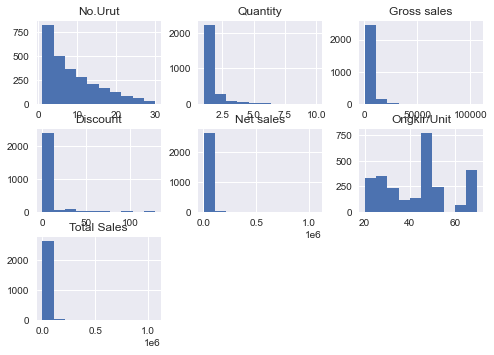

In [13]:
raw_df[desc_numerical.index].hist()

plt.show()

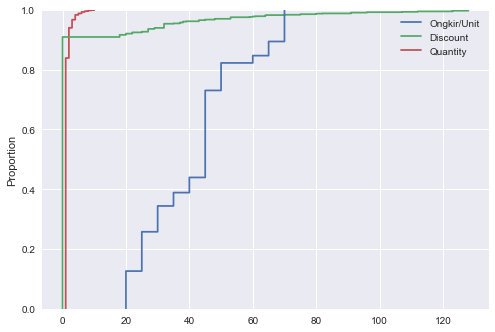

In [14]:
sns.ecdfplot(raw_df[["Ongkir/Unit", 'Discount', 'Quantity']])
plt.show()

#### terlalu skewed dan tinggi kurtosisnya untuk dianalisis, perlu transformasi nilai

In [15]:
numerical_transform = raw_df[['Gross sales','Net sales','Total Sales']].apply(np.log1p)

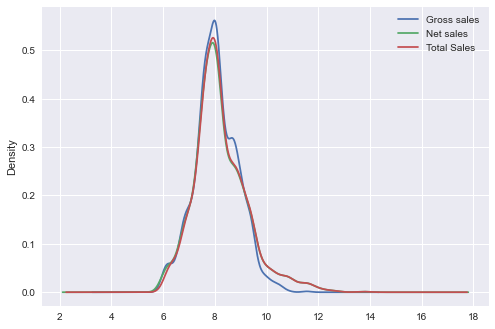

In [16]:
numerical_transform.plot(kind='kde')
plt.show()

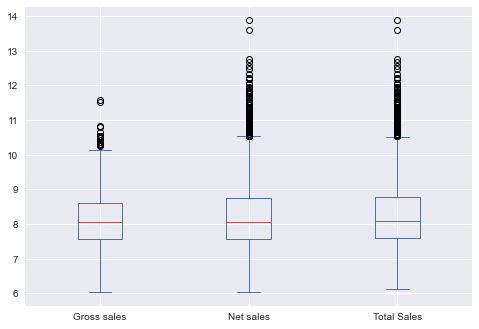

In [17]:
numerical_transform.plot(kind='box')
plt.show()

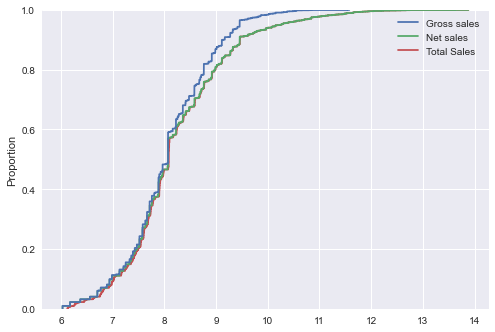

In [18]:
sns.ecdfplot(numerical_transform)
plt.show()

<AxesSubplot:xlabel='Total Sales', ylabel='Gross sales'>

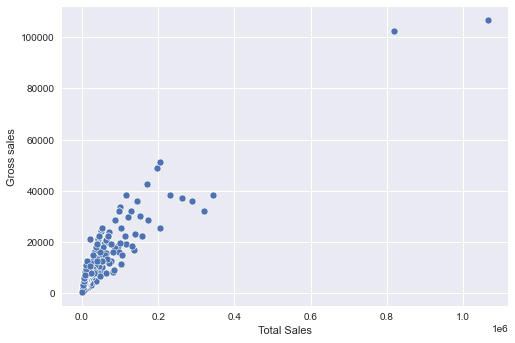

In [19]:
sns.scatterplot(x=raw_df['Total Sales'], y=raw_df['Gross sales'])

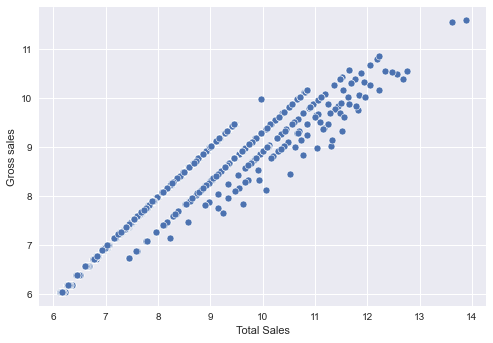

In [20]:
sns.scatterplot(x=numerical_transform['Total Sales'], y=numerical_transform['Gross sales'])
plt.show()

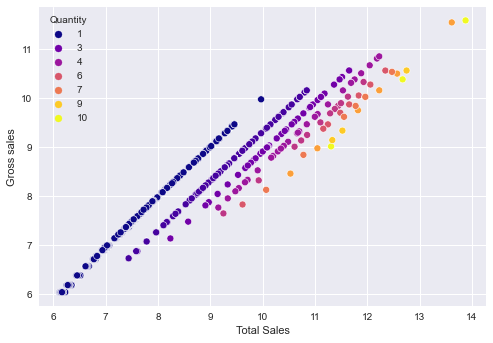

In [21]:
sns.scatterplot(x=numerical_transform['Total Sales'], y=numerical_transform['Gross sales'],
                hue=raw_df['Quantity'], palette='plasma')
plt.show()

### Outliers

<AxesSubplot:xlabel='Gross sales_zscore'>

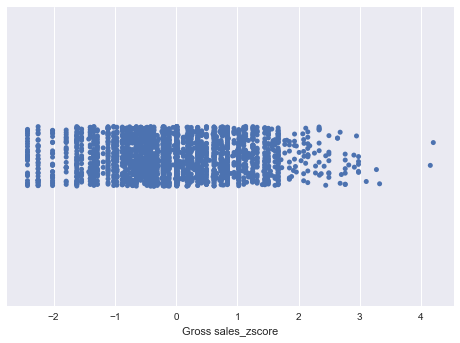

In [22]:
cols = numerical_transform.columns
for col in cols:
    col_zscore = col + '_zscore'
    numerical_transform[col_zscore] = (numerical_transform[col] - numerical_transform[col].mean())/numerical_transform[col].std(ddof=0)
sns.stripplot(data = numerical_transform, x='Gross sales_zscore', dodge=True)

<AxesSubplot:xlabel='Gross sales'>

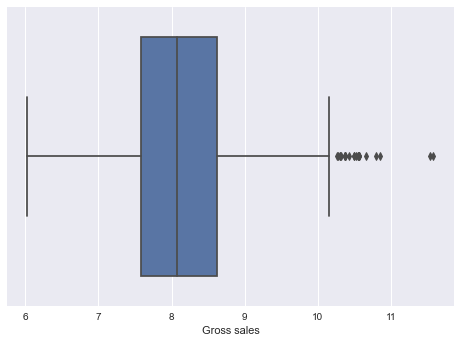

In [23]:
sns.boxplot(data=numerical_transform, x='Gross sales')

## Categorical
### Summary Table

In [24]:
counts = raw_df['ID Salesman'].value_counts()
counts

205347    399
359608    375
956821    360
848311    280
599012    260
502509    220
669618    215
458320    209
185077    197
430843    148
Name: ID Salesman, dtype: int64

In [25]:
raw_df['ID Salesman'].value_counts(normalize=True)

205347    0.149831
359608    0.140819
956821    0.135186
848311    0.105145
599012    0.097634
502509    0.082614
669618    0.080736
458320    0.078483
185077    0.073977
430843    0.055576
Name: ID Salesman, dtype: float64

In [26]:
summarize = raw_df.groupby('ID Salesman')['Total Sales'].sum()
summarize.sort_values(ascending=False)

ID Salesman
956821    4455467
205347    3971342
359608    3199766
848311    2715354
599012    2164278
185077    1708465
502509    1497868
458320    1446487
669618    1429591
430843    1056399
Name: Total Sales, dtype: int64

In [27]:
# rata - rata per Salesman
mean_sales = (summarize / counts).sort_values(ascending=False)
mean_sales

956821    12376.297222
205347     9953.238095
848311     9697.692857
185077     8672.411168
359608     8532.709333
599012     8324.146154
430843     7137.831081
458320     6920.990431
502509     6808.490909
669618     6649.260465
dtype: float64

<AxesSubplot:>

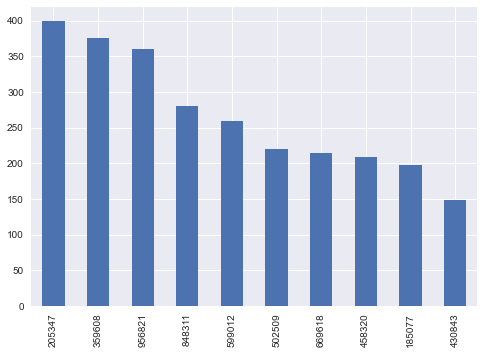

In [28]:
counts.plot.bar()

<AxesSubplot:xlabel='ID Salesman'>

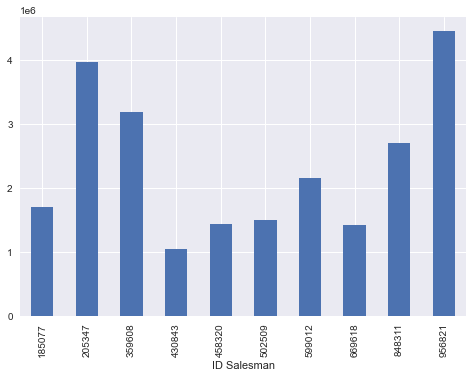

In [29]:
summarize.plot.bar()

<AxesSubplot:>

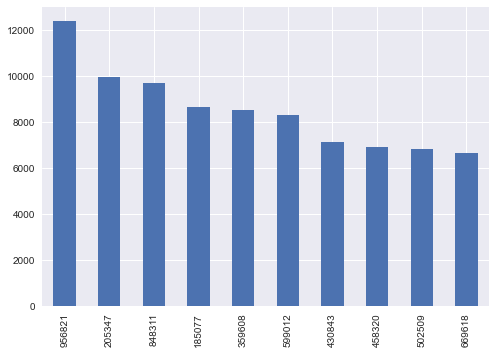

In [30]:
mean_sales.plot.bar()

### Cross Tab

In [31]:
cont_tab1 = pd.crosstab(raw_df['ID Salesman'], raw_df['Nama Pelanggan'])
cont_tab1

Nama Pelanggan,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,Dallas Cycles,Denver Bike Shop,Detroit Cycles,Indianapolis Velocipedes,Ithaca Mountain Climbers,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
ID Salesman,,,,,,,,,,,,,,,,,,,,,
185077,0,3,0,1,0,0,26,1,0,16,...,0,8,0,0,24,0,1,4,14,0
205347,0,2,0,0,54,0,58,0,28,34,...,16,3,0,37,5,0,11,0,1,0
359608,0,0,19,0,0,20,25,8,0,13,...,20,66,1,18,0,0,18,0,0,13
430843,0,11,0,0,0,0,1,0,0,6,...,0,16,0,16,0,0,0,0,0,20
458320,16,0,0,3,0,0,22,27,0,3,...,5,6,2,17,0,2,3,0,0,0
502509,0,2,1,0,0,1,36,2,0,0,...,0,15,0,2,0,18,0,0,0,0
599012,0,28,0,0,7,3,44,3,0,26,...,4,8,0,10,3,0,1,0,0,30
669618,0,0,1,18,0,0,12,0,0,2,...,0,32,3,30,1,0,6,2,0,30
848311,0,29,0,3,0,3,24,0,1,18,...,0,6,20,20,11,0,0,0,0,1


In [32]:
cont_tab2 = pd.crosstab(raw_df['ID Salesman'], raw_df['Jenis Kirim'],normalize='columns')
cont_tab2

Jenis Kirim,1,2
ID Salesman,,
185077,0.071271,0.076805
205347,0.139603,0.160522
359608,0.150625,0.130568
430843,0.061719,0.049155
458320,0.072741,0.084485
502509,0.086701,0.078341
599012,0.092579,0.102919
669618,0.083762,0.077573
848311,0.101396,0.109063


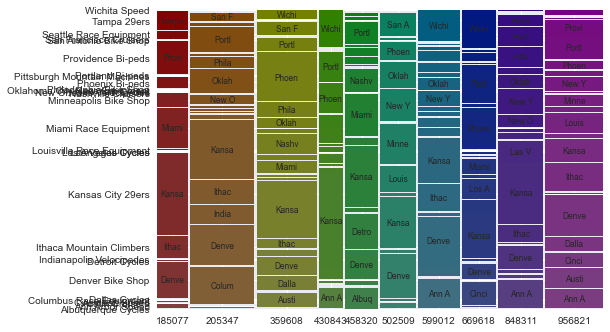

In [33]:
labels = lambda x: x[1][:5] if cont_tab1.stack()[int(x[0])][x[1]] > 10 else "" 

mosaic(cont_tab1.stack(), labelizer=labels)
plt.show()

<AxesSubplot:xlabel='ID Salesman'>

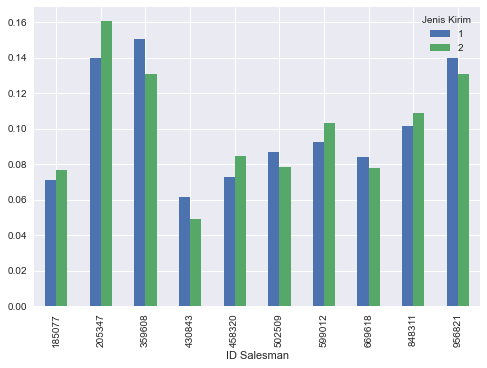

In [34]:
cont_tab2.plot.bar()

### Categorical vs Numerical

In [35]:
num_var = 'Gross sales'
cat_var = 'ID Salesman'
concat_df = pd.DataFrame([numerical_transform[num_var], raw_df[cat_var]]).T

#Filtering category yang akan di visualisasi
# mask = concat_df[cat_var].isin([669618,848311])
# concat_df = concat_df[mask]
concat_df.head()

,Gross sales,ID Salesman
0,8.917445,669618.0
1,7.714677,669618.0
2,8.946505,669618.0
3,8.071219,848311.0
4,8.581294,848311.0


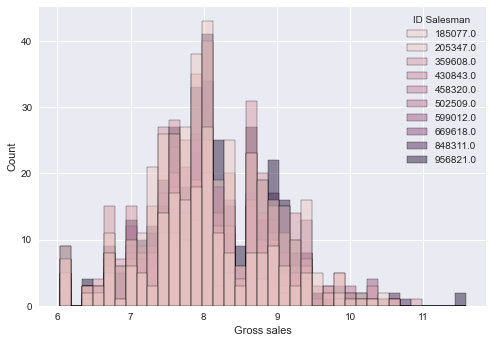

In [36]:
# separate histogram
sns.histplot(hue=cat_var, x=num_var, data=concat_df)
plt.show()

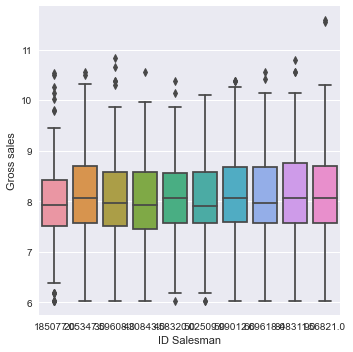

In [37]:
# separate boxplot
sns.catplot(x=cat_var, y=num_var, data=concat_df,kind = 'box')
plt.show()

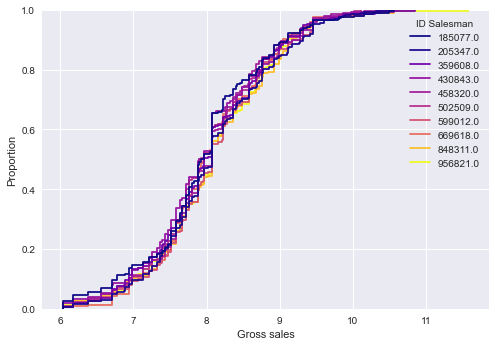

In [38]:
sns.ecdfplot(data=concat_df, x=num_var, hue=cat_var, palette='plasma')
plt.show()